In [63]:
# https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

def column_to_lower_case(df:pd.DataFrame):
    column_list = []
    for col in df.columns:
        column_list.append(col.lower())
    df.columns = column_list

def text_encoding(df:pd.DataFrame):
    print()


def ctg_dist(df:pd.DataFrame, cols, hue=None, rows=4, columns=2):
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                      data=df,
                      hue=hue,
                      ax=j,
                      order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)

        total = float(len(df[i]))
        j.set_title(f'{str(i).capitalize()} Distribution')

        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                   height + 2,
                   '{:1.2f}%'.format((height / total) * 100),
                   ha='center')

        plt.tight_layout()
    plt.show()

In [82]:
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [65]:
plt.style.use('ggplot')

In [66]:
df = pd.read_csv('C:/rain/archive/weatherAUS.csv', encoding='utf-8-sig')
column_to_lower_case(df)
df.head(5)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [67]:
df.set_index(df['date'], inplace=True)
df = df.drop(['date'], axis=1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       145460 non-null  object 
 1   mintemp        143975 non-null  float64
 2   maxtemp        144199 non-null  float64
 3   rainfall       142199 non-null  float64
 4   evaporation    82670 non-null   float64
 5   sunshine       75625 non-null   float64
 6   windgustdir    135134 non-null  object 
 7   windgustspeed  135197 non-null  float64
 8   winddir9am     134894 non-null  object 
 9   winddir3pm     141232 non-null  object 
 10  windspeed9am   143693 non-null  float64
 11  windspeed3pm   142398 non-null  float64
 12  humidity9am    142806 non-null  float64
 13  humidity3pm    140953 non-null  float64
 14  pressure9am    130395 non-null  float64
 15  pressure3pm    130432 non-null  float64
 16  cloud9am       89572 non-null   float64
 17  cloud3pm       86102 

In [80]:
df.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
desc = df.describe()
numeric_cols = desc.columns.tolist()
categorical_cols = [col for col in df.columns if col not in numeric_cols]

categorical_cols.append('cloud9am')
categorical_cols.append('cloud3pm')
numeric_cols.remove('cloud9am')
numeric_cols.remove('cloud3pm')

In [70]:
print(numeric_cols)
print(categorical_cols)

['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine', 'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'temp9am', 'temp3pm']
['location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow', 'cloud9am', 'cloud3pm']


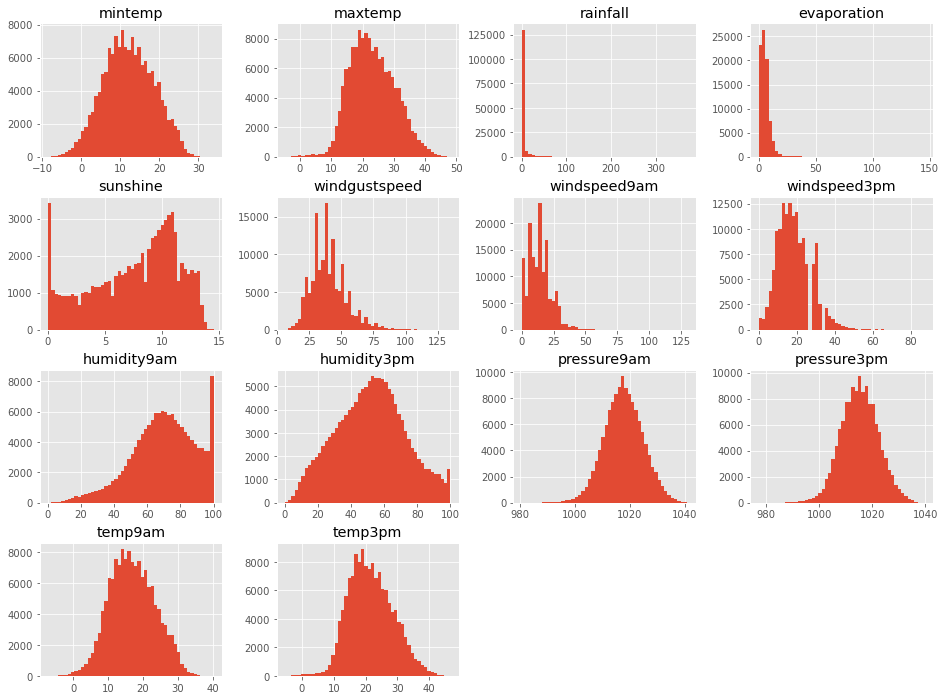

In [71]:
# histogram
df_numeric.hist(bins=50, figsize=(16, 12))
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\anaconda3\lib\s

<AxesSubplot:title={'center':'evaporation boxplot'}, xlabel='evaporation'>

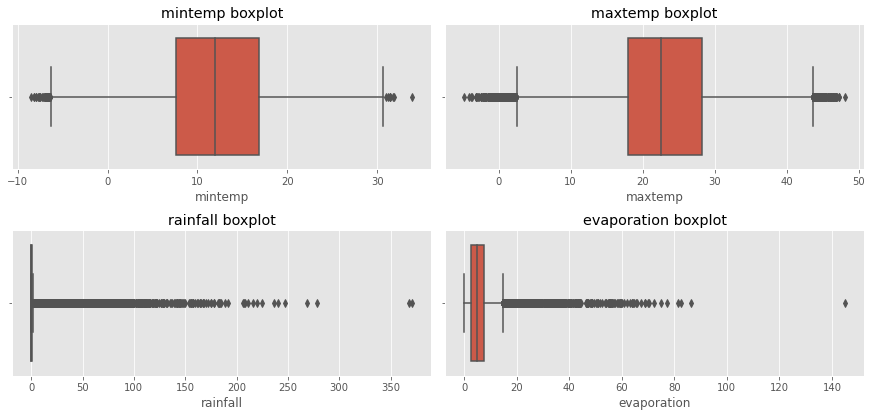

In [95]:
# boxplot
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
grid = gridspec.GridSpec(ncols=4, nrows=4, figure=fig)

ax11 = fig.add_subplot(grid[0, :2])
ax11.set_title('mintemp boxplot')
sns.boxplot(df['mintemp'], orient='v')

ax12 = fig.add_subplot(grid[0, 2:4])
ax12.set_title('maxtemp boxplot')
sns.boxplot(df['maxtemp'], orient='v')

ax21 = fig.add_subplot(grid[1, :2])
ax21.set_title('rainfall boxplot')
sns.boxplot(df['rainfall'], orient='v')

ax22 = fig.add_subplot(grid[1, 2:4])
ax22.set_title('evaporation boxplot')
sns.boxplot(df['evaporation'], orient='v')

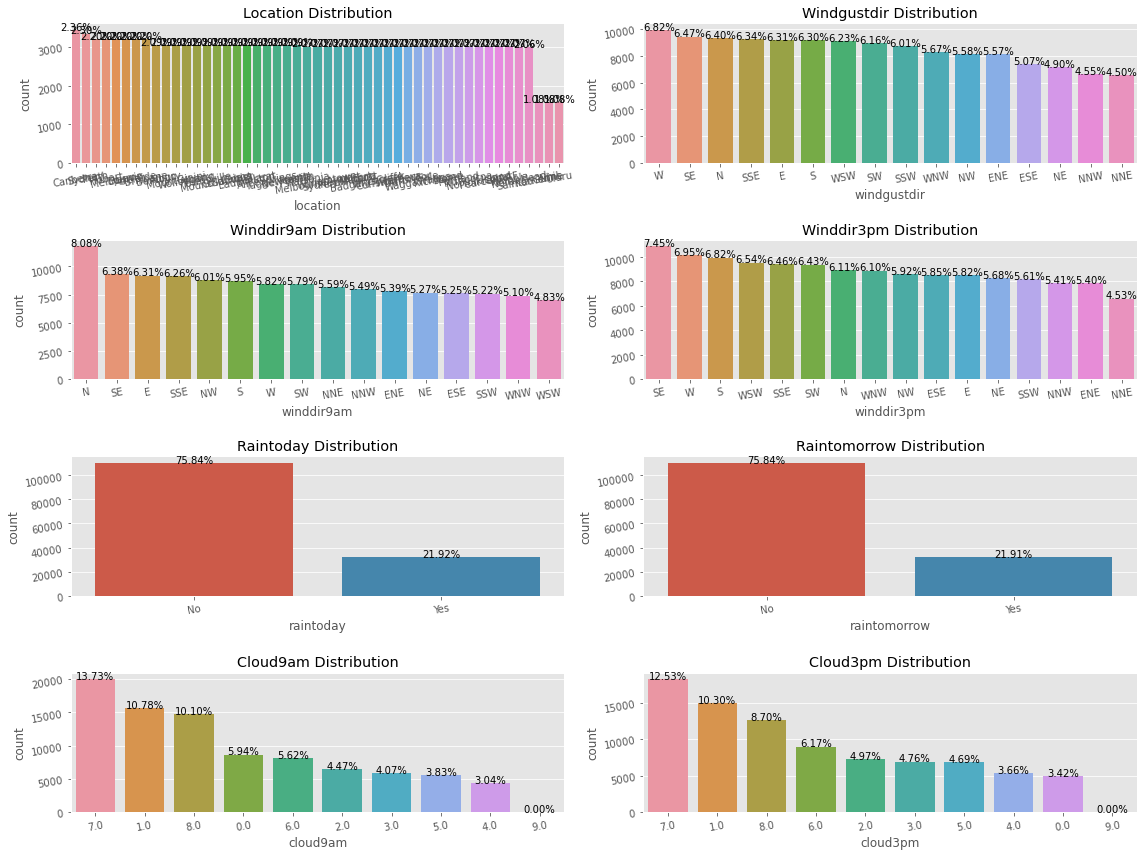

In [72]:
# countplot
ctg_dist(df, categorical_cols)

In [73]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
print(train.shape)
print(test.shape)

(116368, 22)
(29092, 22)


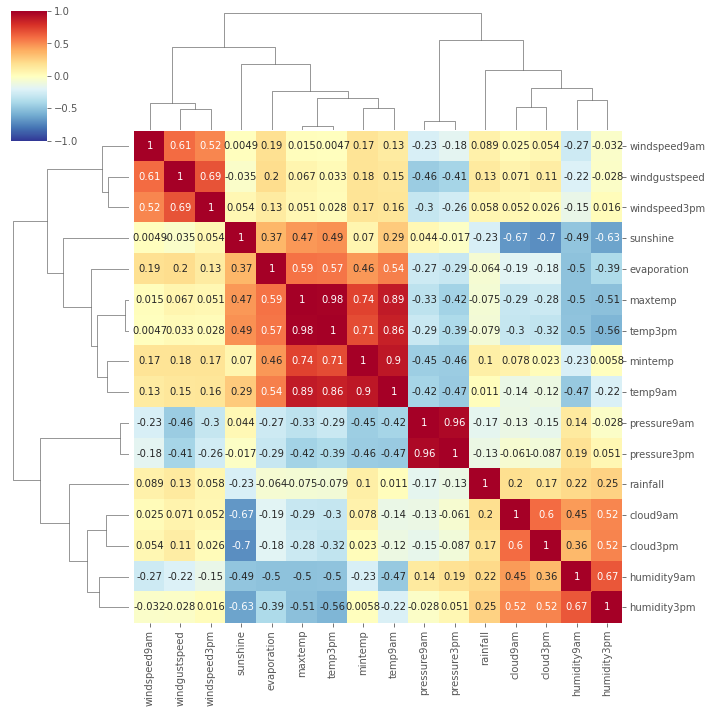

In [74]:
# correlation
corr_matrix = train.corr()
sns.clustermap(corr_matrix,
               annot = True,
               cmap = 'RdYlBu_r',
               vmin = -1,
               vmax = 1)

array([[<AxesSubplot:xlabel='rainfall', ylabel='rainfall'>,
        <AxesSubplot:xlabel='humidity9am', ylabel='rainfall'>,
        <AxesSubplot:xlabel='humidity3pm', ylabel='rainfall'>],
       [<AxesSubplot:xlabel='rainfall', ylabel='humidity9am'>,
        <AxesSubplot:xlabel='humidity9am', ylabel='humidity9am'>,
        <AxesSubplot:xlabel='humidity3pm', ylabel='humidity9am'>],
       [<AxesSubplot:xlabel='rainfall', ylabel='humidity3pm'>,
        <AxesSubplot:xlabel='humidity9am', ylabel='humidity3pm'>,
        <AxesSubplot:xlabel='humidity3pm', ylabel='humidity3pm'>]],
      dtype=object)

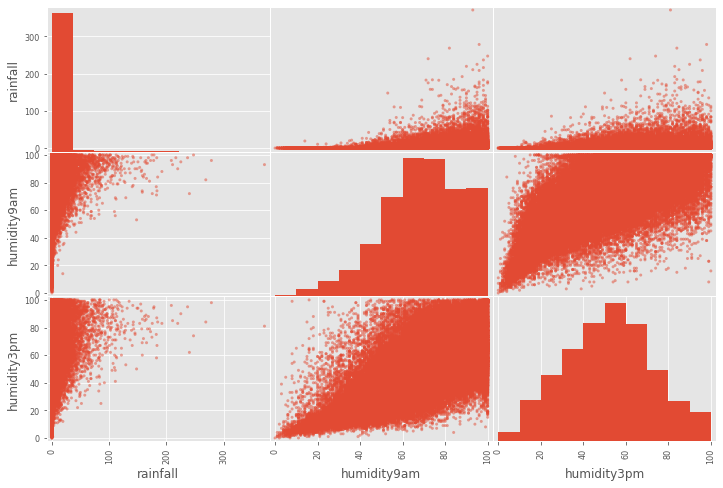

In [75]:
tmp_cols = ['rainfall', 'humidity9am', 'humidity3pm']
scatter_matrix(train[tmp_cols], figsize=(12, 8))

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


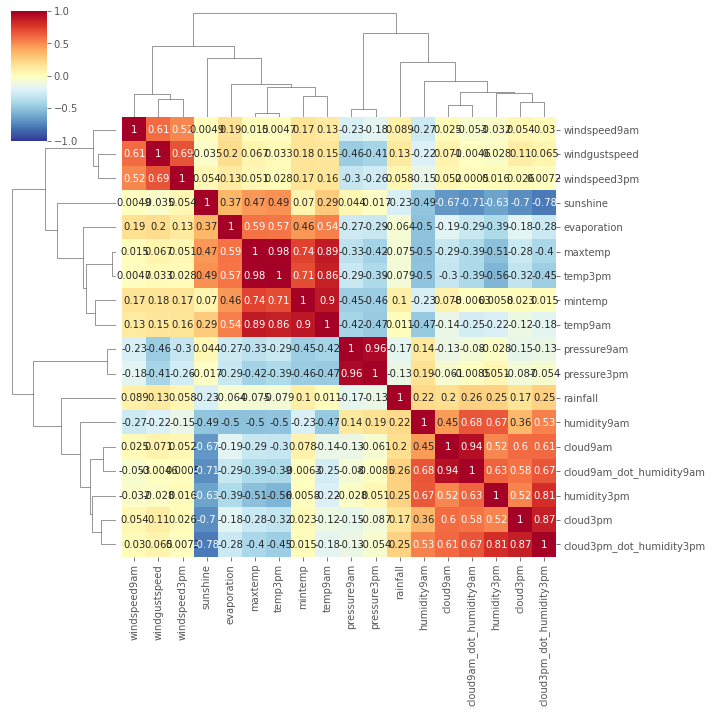

In [76]:
# feature creation
train['cloud9am_dot_humidity9am'] = train['cloud9am'] * train['humidity9am']
train['cloud3pm_dot_humidity3pm'] = train['cloud3pm'] * train['humidity3pm']

corr_matrix = train.corr()
sns.clustermap(corr_matrix,
               annot = True,
               cmap = 'RdYlBu_r',
               vmin = -1,
               vmax = 1)

In [77]:
# preprocessing
train_X = train.drop('raintomorrow', axis=1)
train_Y = train['raintomorrow'].copy()

print(train_X.shape)
print(train_Y.shape)
print(train_X.isna().sum())
train_X[train_X['sunshine'].isna()].head(5)

(116368, 23)
(116368,)
location                        0
mintemp                      1178
maxtemp                       998
rainfall                     2604
evaporation                 50329
sunshine                    55942
windgustdir                  8250
windgustspeed                8202
winddir9am                   8429
winddir3pm                   3397
windspeed9am                 1408
windspeed3pm                 2457
humidity9am                  2117
humidity3pm                  3616
pressure9am                 12061
pressure3pm                 12042
cloud9am                    44757
cloud3pm                    47548
temp9am                      1405
temp3pm                      2897
raintoday                    2604
cloud9am_dot_humidity9am    45036
cloud3pm_dot_humidity3pm    47801
dtype: int64


,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,cloud9am_dot_humidity9am,cloud3pm_dot_humidity3pm
date,,,,,,,,,,,,,,,,,,,,,
2017-04-24,Albany,14.5,17.8,14.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1024.1,1022.5,8.0,NaN,16.2,NaN,Yes,752.0,NaN
2013-10-11,Katherine,24.6,39.5,0.0,12.0,NaN,SE,31.0,N,NW,...,21.0,1011.8,1006.6,2.0,4.0,30.1,39.2,No,104.0,84.0
2012-02-18,Williamtown,18.3,26.6,0.0,NaN,NaN,SE,28.0,WSW,SSE,...,67.0,1017.0,1016.5,6.0,NaN,23.0,25.4,No,474.0,NaN
2016-02-23,Albury,20.1,39.5,0.0,NaN,NaN,N,41.0,ESE,NNW,...,19.0,1017.7,1013.3,NaN,NaN,26.5,38.4,No,NaN,NaN
2009-11-06,Launceston,5.7,19.8,0.0,NaN,NaN,NW,37.0,NW,NW,...,53.0,1025.9,1025.4,NaN,NaN,12.5,18.9,No,NaN,NaN


In [78]:
# NaN to 0
train_X.fillna(0, inplace=True)
print(train_X.isna().sum())
train_X.head(5)

location                    0
mintemp                     0
maxtemp                     0
rainfall                    0
evaporation                 0
sunshine                    0
windgustdir                 0
windgustspeed               0
winddir9am                  0
winddir3pm                  0
windspeed9am                0
windspeed3pm                0
humidity9am                 0
humidity3pm                 0
pressure9am                 0
pressure3pm                 0
cloud9am                    0
cloud3pm                    0
temp9am                     0
temp3pm                     0
raintoday                   0
cloud9am_dot_humidity9am    0
cloud3pm_dot_humidity3pm    0
dtype: int64


,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,cloud9am_dot_humidity9am,cloud3pm_dot_humidity3pm
date,,,,,,,,,,,,,,,,,,,,,
2017-04-24,Albany,14.5,17.8,14.2,0.0,0.0,0,0.0,0,0,...,0.0,1024.1,1022.5,8.0,0.0,16.2,0.0,Yes,752.0,0.0
2013-10-11,Katherine,24.6,39.5,0.0,12.0,0.0,SE,31.0,N,NW,...,21.0,1011.8,1006.6,2.0,4.0,30.1,39.2,No,104.0,84.0
2012-02-18,MelbourneAirport,14.7,26.6,0.2,3.2,8.0,SSE,30.0,SW,S,...,57.0,1018.2,1015.4,7.0,3.0,17.3,24.5,No,609.0,171.0
2012-02-18,Williamtown,18.3,26.6,0.0,0.0,0.0,SE,28.0,WSW,SSE,...,67.0,1017.0,1016.5,6.0,0.0,23.0,25.4,No,474.0,0.0
2011-10-11,Adelaide,11.4,19.3,0.6,2.4,8.9,W,31.0,SW,SSW,...,47.0,1018.6,1017.1,0.0,0.0,14.4,18.3,No,0.0,0.0
